# **<u>Linear Regression</u>**

---

Table of contents:

1. [What is Linear Regression?](#What-is-Linear-Regression)
1. [Single Linear Regression](#Single-Linear-Regression)
1. [Multiple Linear Regression](#Multiple-Linear-Regression)
1. [Logistic Regression](#Logistic-Regression)

## What is Linear Regression?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

- It is a Machine Learning Model.
- It is used to "fit a straight line" to the data.
- Finds a linear relationship between input data and output data.

*What is linear?*

Linear means that it is an algebraic function which finds a relationship that looks like so:
$$ y = f(x) $$

Where f is a polynomial function of **degree 1.**

Thus, the final function will look like so: $$y = w*x + b$$

![](https://acadgild.com/blog/wp-content/uploads/2018/07/Linear-Regression.jpg)

Where w and b are 2 *parameters* that the model will find out.

y is known an the **dependent variable**, as it depends on x.

x is known as the **independent variable**, since it is our input and is independent of any constraints.

Now, how is this going to be calculated? This is where the math kicks in.

### Parameter Calculation

A simple way to think about this problem:

- Suppose you are given as sample data house area in square feet, and corresponding values of house prices. Now, your x value is the house area, and the y value is the value of house prices.
- Here, we are considering that given the area, we want to predict the price of the house. Thus, the price is *dependent* on the area.

So, now we want the values of w and b that allow us to perform this task. But a simple question arises - *how do we judge the performance of our model?*

The answer lies in what we saw in the previous lecture - a **performance metric.**

![](http://onlinestatbook.com/2/regression/graphics/reg_error.gif)

This is a regression task, as the name of the model implies. So we will use a regression metric.

We generally resort to use of the mean squared error.

$$J = \frac{1}{2n}*\sum_{i=0}^{n-1} (\hat{y}_{i} - y_{i})^2$$

To get the best values of the parameters, we will look at **gradient descent** and **backpropogation** using this toy example, so we can gain clarity and understand these concepts that are so widely used in Deep Learning.

The mathematical way of finding the right value for a parameter is by using partial differentiation.

**What is differentiation? What does it represent?**

Let's start at what is the rate of change of a function with respect to a variable.

So, given a graph, we want to find out the rate of change of $f(x)$ from some $x_{1}$ to some $x_{2}$.

![](http://xaktly.com/Images/Mathematics/Slope/SlopeDefinition.png)

What does this represent?

This represents the average amount of change of y per unit of x.

When we bring $x_{2}$ closer and closer to $x_{1}$, we eventually end up with:

![](https://www.themathpage.com/aCalc/calc_IMG/007b.png)

![](https://dj1hlxw0wr920.cloudfront.net/userfiles/wyzfiles/8e482816-953a-4e39-b715-f8ef0f6ae356.gif)

The mathematical notation for the same is:
$$\frac{dy}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$

So, what are we doing when we are computing the derivative? We are finding out the rate of change of $y$ wrt $x$.

Now, we also know one more fact:

When we want to find the value of $x$ at which $f(x)$ is minimum, we do $\frac{dy}{dx}=0$

So, we want to find the value of w and b at which we get the minimum value of our performance metric(since it is an error, we want to minimize it). So we naturally resort to our best friend, $\frac{dy}{dx} = 0$

$$ \frac{\partial{J(w,b)}}{\partial{w}} = 0$$

Since this is a function that depends on 2 parameters, we use the partial derivative.

![](https://cdn-images-1.medium.com/max/1600/1*jNyE54fTVOH1203IwYeNEg.png)

So, we update the weights with the gradient value. 

The idea is that the derivative tells us what is the contribution of the parameter that we are differentiating with respect to, to the error value.

$$\frac{\partial{J}}{\partial{w}} = (\hat{y}-y)*x$$

$$\frac{\partial{J}}{\partial{b}} = (\hat{y}-y)$$

We use the following update rule:
$$ w = w - \alpha * \frac{\partial{J}}{\partial{w}}$$

$$ b = b - \alpha * \frac{\partial{J}}{\partial{b}}$$

$\alpha$ is known as the *learning rate*.

We perform this for all the samples we have, multiplr times over, until the gradient(value of the derivative) becomes small enough to terminate.

**Enough theory now. Let's code!**

## Single Linear Regression

In [140]:
import numpy as np

In [222]:
X = np.linspace(1,100,num=100)*5+np.random.randn(100)*30

In [223]:
Y = np.linspace(1,50,num=100)

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
def plot_graph(X,Y,marker = 'bo',ylabel = 'House Price in lakhs', xlabel = 'Area in Square Feet'):
    plt.figure(figsize=(8,5))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if marker is not None:
        plt.plot(X,Y,marker, markersize=1)
    else:
        plt.plot(X,Y)

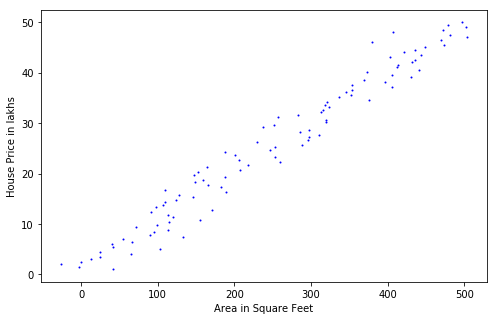

In [226]:
plot_graph(X,Y)

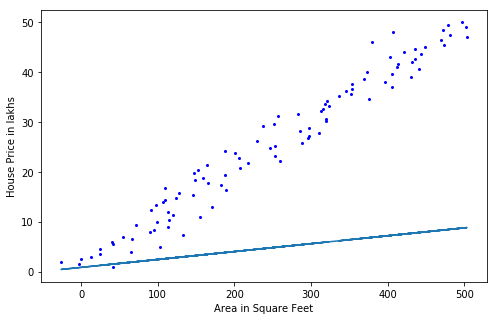

In [227]:
W,b = np.random.randn(2)
alpha = 0.000001
plt.figure(figsize=(8,5))
plt.ylabel('House Price in lakhs')
plt.xlabel('Area in Square Feet')
plt.plot(X,W*X+b)
plt.plot(X,Y,'bo',markersize=2)

In [228]:
W_list = [W]
b_list = [b]
J_list = []

In [229]:
for xi, yi in zip(X,Y):
    yhat = W * xi + b
    J = 1/2*(yhat - yi)**2
    W -= alpha*(yhat-yi)*xi
    b -= alpha*(yhat-yi)
    W_list.append(W)
    b_list.append(b)
    J_list.append(J)

In [230]:
W

0.09977198114664937

In [231]:
b

0.846931335583396

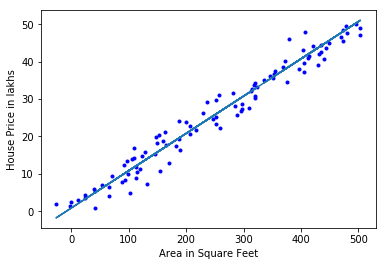

In [232]:
plt.ylabel('House Price in lakhs')
plt.xlabel('Area in Square Feet')
plt.plot(X,Y,'bo', markersize=3)
plt.plot(X, W*X+b)

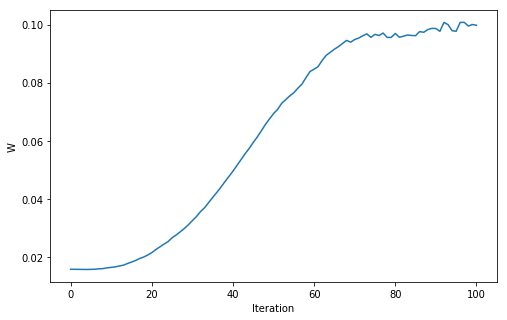

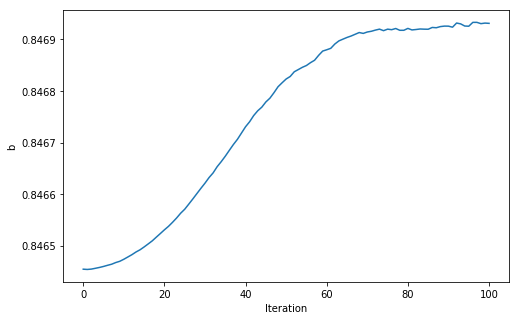

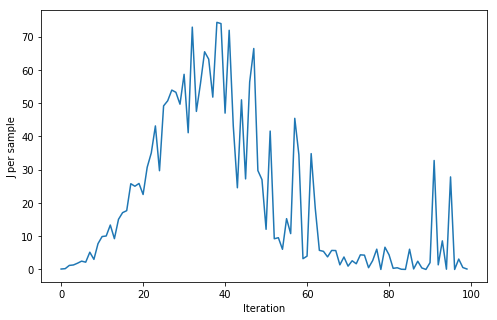

In [233]:
plot_graph(np.arange(len(W_list)),W_list, xlabel = 'Iteration', ylabel = 'W', marker = None)
plot_graph(np.arange(len(b_list)),b_list, xlabel = 'Iteration', ylabel = 'b', marker = None)
plot_graph(np.arange(len(J_list)),J_list, xlabel = 'Iteration', ylabel = 'J per sample', marker = None)

This will be really slow! Going through each sample one by one and updating the gradients accordingly and updating is a slow process. So, to solve this and to make operatrions faster, we will calculate the gradients for a batch of samples together and update the weights and biases by the mean value of the gradients.

So, to do this, we should use vector opeartions that can help speed up this process.

$$X = [ \left( \begin{array} {ccc} x_{0} & x_{1} \end{array} \right) ]$$

$$W = [ \left( \begin{array} {ccc} w_{0} \\ w_{1} \end{array} \right) ]$$

$$X*W = w_{0}*x_{0} + w_{1}*x_{1}$$

$x_{0} = 1$, hence we get back our original equation.

Now, this can be applied to matrices. Note the shape of X is $1 * 2$, and the shape of W is $2 * 1$. Thus, is we add multiple rows to our x, we get an X of shape $n * 2$ where n is the number of examples.

The resulting $X*W$ gives us an $n * 1$ matrix where each row is our prediction.

Thus, we can now calculate the loss (J) and the gradients easily, and speed this up.

(100,)


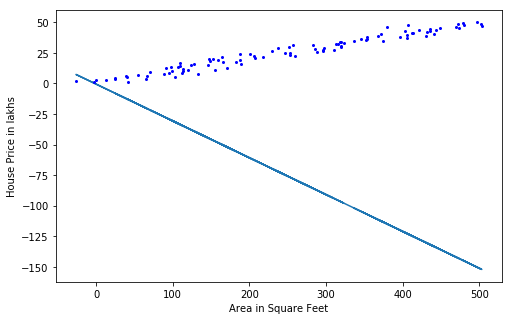

In [234]:
X_arr = np.vstack((X,np.ones(X.shape))).transpose()
print(X.shape)
#raise ValueError
W = np.random.randn(2).reshape(2,1)
alpha = 0.000001
plt.figure(figsize=(8,5))
plt.ylabel('House Price in lakhs')
plt.xlabel('Area in Square Feet')
plt.plot(X,np.matmul(X_arr,W))
plt.plot(X,Y,'bo',markersize=2)

W_list = [W[0,0]]
b_list = [W[1,0]]
J_list = []

In [248]:
batch_size = 10
num_epochs = 5
for epoch in range(num_epochs):
    for idx in range(len(X)//batch_size):
        X_temp = X_arr[idx*10:(idx+1)*10,:]
        Y_temp = Y[idx*10:(idx+1)*10].reshape(10,1)
        yhat = np.matmul(X_temp,W)
        J = 1/(2*batch_size)*(yhat - Y_temp)**2
        W -= np.mean((alpha*(yhat-Y_temp)*X_temp), axis=0).reshape(2,1)
        W_list.append(W[0,0])
        b_list.append(W[1,0])
        J_list.append(J.mean())

In [249]:
W

array([[ 0.09788443],
       [-0.48958871]])

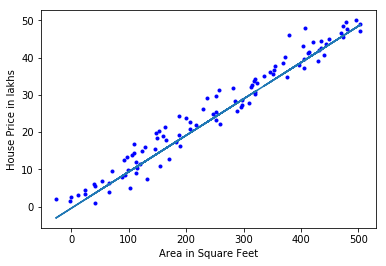

In [250]:
plt.ylabel('House Price in lakhs')
plt.xlabel('Area in Square Feet')
plt.plot(X,Y,'bo', markersize=3)
plt.plot(X, np.matmul(X_arr,W))

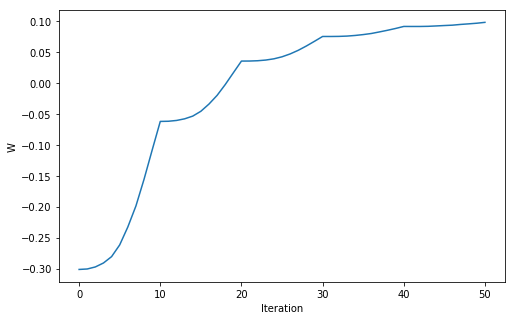

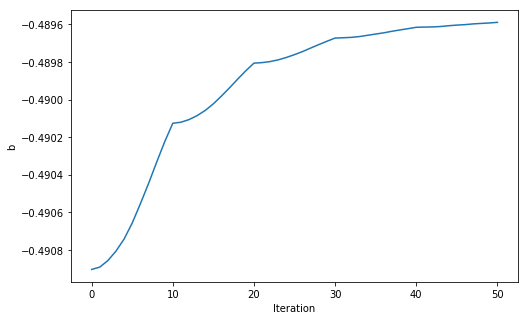

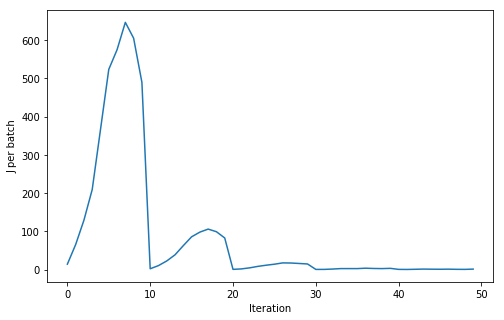

In [251]:
plot_graph(np.arange(len(W_list)),W_list, xlabel = 'Iteration', ylabel = 'W', marker = None)
plot_graph(np.arange(len(b_list)),b_list, xlabel = 'Iteration', ylabel = 'b', marker = None)
plot_graph(np.arange(len(J_list)),J_list, xlabel = 'Iteration', ylabel = 'J per batch', marker = None)

This was single linear regression, as it modelled the relationship between 1 independent and 1 independent variable. Now, let us look at multiple linear regression, to model the relationship between 2 or more independent variable and 1 dependent variable. Remeber, now we cannot visualise the entire input space.

## Multiple Linear Regression

$$y = w_{0} + w_{1}*x_{1} + w_{2}*x_{2} +\space...\space+ w_{n}*x_{n}$$

Here, the input is an n-dimensional vector.

An n-dimenional vector means an array that has n elements.

Now, the first way to perform our linear regression calculation without using vectors/arrays looks like a really bad idea. Why?

Because defining n constants manually is a pain.

Hence, we use our second approach, that is to use an input array of size $m * n$, where m is the number of training samples and n is the dimensionality of the input vector.

Now, we have a weight vector of dimensionality $n * 1$. Thus, we have the output dimensions as $m*1$

$$\frac{\partial{J}}{\partial{w_{j}}} = \sum_{i = 1}^{n}\frac{(\hat{y}_{i}-y_{i})*x^{j}_{i}}{n}$$

We use the following update rule:
$$ w_{i} = w_{i} - \alpha * \frac{\partial{J}}{\partial{w_{i}}}$$

Now, try to modify the earlier code and arrive at the code for multiple linear regression.

In [305]:
from sklearn.datasets import load_diabetes, make_regression

In [275]:
data = load_diabetes()

In [277]:
X, Y = data['data'], data['target']

In [306]:
X,Y = make_regression(500,4)

In [307]:
X.shape

(500, 4)

In [308]:
W = np.random.rand(X.shape[1]+1,1)

In [309]:
X_arr = np.hstack((X,np.ones((X.shape[0],1))))

In [310]:
W1_list = [W[0,0]]
W2_list = [W[1,0]]
W3_list = [W[2,0]]
W4_list = [W[3,0]]
W5_list = [W[4,0]]
J_list = []

In [311]:
alpha = 0.1
batch_size = 10
num_epochs = 5
for epoch in range(num_epochs):
    for idx in range(len(X)//batch_size):
        X_temp = X_arr[idx*batch_size:(idx+1)*batch_size,:]
        Y_temp = Y[idx*batch_size:(idx+1)*batch_size].reshape(batch_size,1)
        yhat = np.matmul(X_temp,W)
        J = 1/(2*batch_size)*(yhat - Y_temp)**2
        W -= np.mean((alpha*(yhat-Y_temp)*X_temp), axis=0).reshape(W.shape[0],1)
        W1_list.append(W[0,0])
        W2_list.append(W[1,0])
        W3_list.append(W[2,0])
        W4_list.append(W[3,0])
        W5_list.append(W[4,0])
        J_list.append(J.mean())

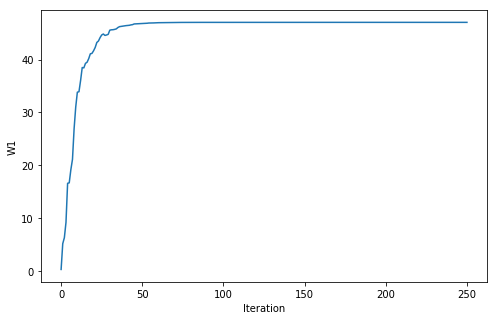

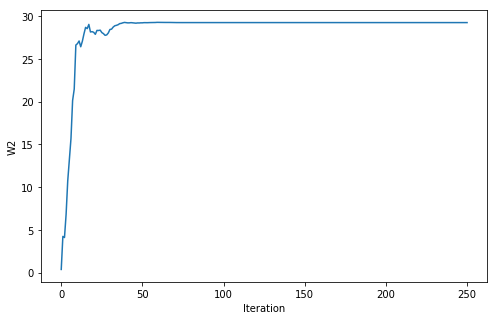

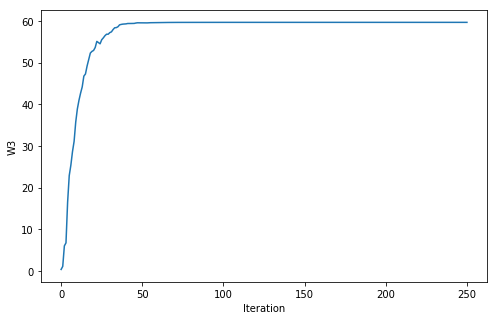

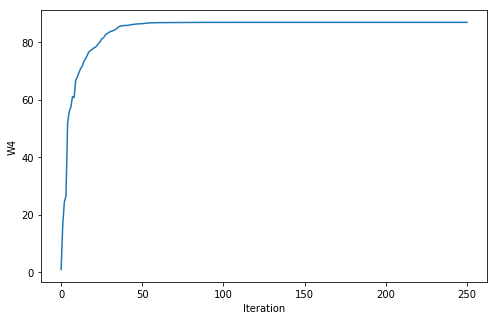

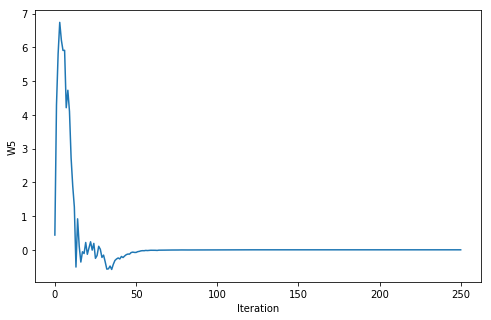

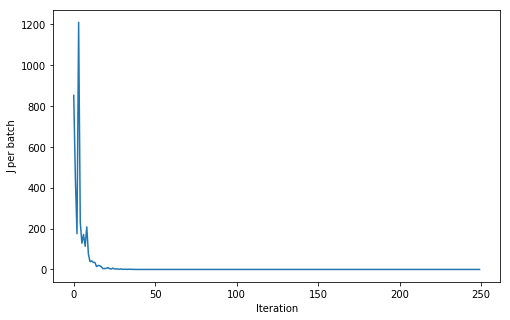

In [312]:
plot_graph(np.arange(len(W1_list)),W1_list, xlabel = 'Iteration', ylabel = 'W1', marker = None)
plot_graph(np.arange(len(W2_list)),W2_list, xlabel = 'Iteration', ylabel = 'W2', marker = None)
plot_graph(np.arange(len(W1_list)),W3_list, xlabel = 'Iteration', ylabel = 'W3', marker = None)
plot_graph(np.arange(len(W2_list)),W4_list, xlabel = 'Iteration', ylabel = 'W4', marker = None)
plot_graph(np.arange(len(W1_list)),W5_list, xlabel = 'Iteration', ylabel = 'W5', marker = None)
plot_graph(np.arange(len(J_list)),J_list, xlabel = 'Iteration', ylabel = 'J per batch', marker = None)

Thus, we implement our multiple linear regression. This multiple linear regression is the base for neural networks, where we use backpropogation(via the use of chain rule)  to propogate the gradients backward.

An artificial neural network can be viewed as a series of linear regression units. The hidden layer contains a number of such units, each of which generate an output. This layer's output is used as input to the next layer's output and so on.

![](https://i.stack.imgur.com/qtSik.png)

The use of the chain rule of calculus enables gradient calculation for each weight in the matrix.

## Logistic Regression

The same linear regression can be used to perform classification, by passing the output through a layer known as the sigmoid layer.

Consider that you are classifying whether the input is good or bad. Now, for 'good' input, you say that your output should be higher that a certain threshold. This is the principle behind Logistic Regression.

We use a function called sigmoid to map the outputs from the set of real numbers to \[0,1], and then define a threshold(usually 0.5) for classification.

$$y = sigmoid(w_{0} + w_{1}*x_{1} + w_{2}*x_{2} +\space...\space+ w_{n}*x_{n})$$

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Sigmoid-function-2.svg/2000px-Sigmoid-function-2.svg.png)

The problem is we have labels as outputs. Hence, we have to use a different loss function known as the crossentropy function. The same math will be used to determine gradients, and then perform calculation of weights.

![](https://image.slidesharecdn.com/cikm-16-rtb-full-170316083738/95/learning-prediction-and-optimisation-in-rtb-display-advertising-44-638.jpg?cb=1489653680)